In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font',family='Malgun Gothic')
import seaborn as sns
import pandas as pd
import scipy.stats as stats
import numpy as np

In [2]:
df_BM = pd.read_csv('../../datasets/JoinCollection NSC2_BND_M20.csv')
df_BM[:2]

,Unnamed: 0,EDC_SBA,BTH_YYYY,DTH_YYYYMM,MCARE_SUBJ_CD,OPRTN_YN,TOT_PRSC_DD_CNT,MCARE_RSLT_TYPE,STD_YYYY
0,0,3000,1921LE,200805.0,1,0,30,5.0,2002
1,1,6000,1921LE,200805.0,1,0,60,5.0,2002


In [3]:
df_BM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4629 entries, 0 to 4628
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       4629 non-null   int64  
 1   EDC_SBA          4629 non-null   int64  
 2   BTH_YYYY         4629 non-null   object 
 3   DTH_YYYYMM       373 non-null    float64
 4   MCARE_SUBJ_CD    4629 non-null   int64  
 5   OPRTN_YN         4629 non-null   int64  
 6   TOT_PRSC_DD_CNT  4629 non-null   int64  
 7   MCARE_RSLT_TYPE  4205 non-null   float64
 8   STD_YYYY         4629 non-null   int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 325.6+ KB


In [4]:
df_BM_HP=df_BM[['EDC_SBA','BTH_YYYY', 'DTH_YYYYMM', 'MCARE_SUBJ_CD', 'OPRTN_YN', 'TOT_PRSC_DD_CNT', 'MCARE_RSLT_TYPE', 'STD_YYYY' ]]
df_BM_HP

,EDC_SBA,BTH_YYYY,DTH_YYYYMM,MCARE_SUBJ_CD,OPRTN_YN,TOT_PRSC_DD_CNT,MCARE_RSLT_TYPE,STD_YYYY
0,3000,1921LE,200805.0,1,0,30,5.0,2002
1,6000,1921LE,200805.0,1,0,60,5.0,2002
2,3000,1921LE,200805.0,1,0,30,5.0,2002
3,4200,1921LE,200805.0,23,0,7,1.0,2007
4,1500,1921LE,201409.0,1,0,7,5.0,2004
...,...,...,...,...,...,...,...,...
4624,3000,2005,NaN,1,0,30,1.0,2005
4625,3000,2005,NaN,1,0,30,1.0,2005
4626,3000,2005,NaN,1,0,30,1.0,2005
4627,3000,2005,NaN,1,0,30,1.0,2006


### quest (DDA) 
- 목표변수: EDC_SBA (심결본인부담금)
- 하단의 주어진 변수들을 사용해서 목적변수(EDC_SBA 심결본인부담금)를 예측하고, 각 변수의 기여도 및 차이를 분석하려 함. 
- 데이터타입
    1. 연속형 : EDC_SBA 심결본인부담금
    2. 범주형 : 'MCARE_SUBJ_CD'(진료과목코드), / 'OPRTN_YN'(수술여부)/ 'MCARE_RSLT_TYPE'(진료결과구분)
    
   
- 설명변수

### 담당 부분 
- 'EDC_SBA'(심결본인부담금) / MCARE_SUBJ_CD (진료과목코드), OPRTN_YN(수술여부), MCARE_RSLT_TYPE(진료결과구분)


In [20]:
#'EDC_SBA'(심결본인부담금) / MCARE_SUBJ_CD (진료과목코드), OPRTN_YN(수술여부), MCARE_RSLT_TYPE(진료결과구분)

df_BM_HP=df_BM[['EDC_SBA', 'MCARE_SUBJ_CD', 'OPRTN_YN' , 'MCARE_RSLT_TYPE']]
df_BM_HP[:2]

,EDC_SBA,MCARE_SUBJ_CD,OPRTN_YN,MCARE_RSLT_TYPE
0,3000,1,0,5.0
1,6000,1,0,5.0


In [21]:
df_BM_HP.describe()

,EDC_SBA,MCARE_SUBJ_CD,OPRTN_YN,MCARE_RSLT_TYPE
count,4629.000000,4629.000000,4629.000000,4205.000000
mean,4627.070642,1.929574,0.005833,1.899168
std,17928.691046,4.398206,0.229069,1.752071
min,0.000000,0.000000,0.000000,1.000000
25%,1500.000000,1.000000,0.000000,1.000000
50%,2900.000000,1.000000,0.000000,1.000000
75%,3100.000000,1.000000,0.000000,1.000000
max,574770.000000,24.000000,9.000000,9.000000


### 데이터 타입 
- 연속형:  'EDC_SBA'(심결본인부담금) 목표변수 
- 범주형:  'MCARE_SUBJ_CD'(진료과목코드), 'OPRTN_YN'(수술여부), 'MCARE_RSLT_TYPE'(MCARE_RSLT_TYPE 진료결과구분)

In [22]:
df_BM_HP.dtypes #데이터 타입 확인

EDC_SBA              int64
MCARE_SUBJ_CD        int64
OPRTN_YN             int64
MCARE_RSLT_TYPE    float64
dtype: object

In [23]:
df_BM_HP['MCARE_RSLT_TYPE']

0       5.0
1       5.0
2       5.0
3       1.0
4       5.0
       ... 
4624    1.0
4625    1.0
4626    1.0
4627    1.0
4628    1.0
Name: MCARE_RSLT_TYPE, Length: 4629, dtype: float64

####   타입 변경  = 'MCARE_SUBJ_CD'(진료과목코드), 'OPRTN_YN'(수술여부), 'MCARE_RSLT_TYPE'(MCARE_RSLT_TYPE 진료결과구분)

In [24]:
# 진료과목코드/수술여부/MCARE_RSLT_TYPE 진료결과구분
df_BM_HP[[ 'MCARE_SUBJ_CD', 'OPRTN_YN' , 'MCARE_RSLT_TYPE']] = df_BM_HP[[ 'MCARE_SUBJ_CD', 'OPRTN_YN' , 'MCARE_RSLT_TYPE']].astype(object)

C:\Users\5-20\AppData\Local\Temp\ipykernel_13720\1854086209.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_BM_HP[[ 'MCARE_SUBJ_CD', 'OPRTN_YN' , 'MCARE_RSLT_TYPE']] = df_BM_HP[[ 'MCARE_SUBJ_CD', 'OPRTN_YN' , 'MCARE_RSLT_TYPE']].astype(object)


In [25]:
df_BM_HP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4629 entries, 0 to 4628
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   EDC_SBA          4629 non-null   int64 
 1   MCARE_SUBJ_CD    4629 non-null   object
 2   OPRTN_YN         4629 non-null   object
 3   MCARE_RSLT_TYPE  4205 non-null   object
dtypes: int64(1), object(3)
memory usage: 144.8+ KB


In [26]:
df_BM_HP.describe()[:2] # 범주형

,EDC_SBA
count,4629.000000
mean,4627.070642


### EDC_SBA (심결본인부담금) 시각화 확인 

In [27]:
df_BM_HP['EDC_SBA'].describe()

count      4629.000000
mean       4627.070642
std       17928.691046
min           0.000000
25%        1500.000000
50%        2900.000000
75%        3100.000000
max      574770.000000
Name: EDC_SBA, dtype: float64

In [28]:
df_BM_HP['EDC_SBA'].value_counts()

1500     1483
3000      945
500       284
3100      195
2900      173
         ... 
25240       1
20500       1
10700       1
7000        1
25200       1
Name: EDC_SBA, Length: 380, dtype: int64

In [29]:
#평균값 = 4627.070641607259
df_BM_HP['EDC_SBA'].mean() #4627.070641607259원 
#df_BM_HP['EDC_SBA'].min() #0원 
#df_BM_HP['EDC_SBA'].median() # 2900.0원
#df_BM_HP['EDC_SBA'].max() # 574770원

4627.070641607259

<Axes: xlabel='EDC_SBA'>

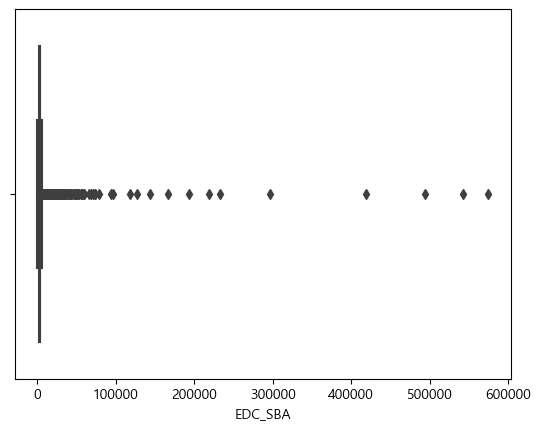

In [30]:
sns.boxplot(data=df_BM_HP,x='EDC_SBA')